# Experiment 1: Fine-Tuning / From Scratch Training

In [1]:
import pandas as pd
import pyvista as pv

In [2]:
results = pd.read_csv("../eval/TestEvaluation/mesh_eval_results.csv")

# print all models unqieu in csv

re_models = results["model"].unique()
print(re_models)

['pix2vox_aug' 'pix2vox_aug_1img' 'pix2vox_aug_3img' 'pix2vox_aug_4img'
 'pix2vox_aug_5img' 'pix2vox_aug_6img' 'pix2vox_aug_frozen_encdec'
 'pix2vox_base' 'pix2vox_non_pretrained' 'vh_1img' 'vh_2img' 'vh_3img'
 'vh_4img' 'vh_5img' 'vh_6img' 'coarse_mvp2m_2_inputs_none_augmentation'
 'coarse_mvp2m_augmentation_2_inputs'
 'coarse_mvp2m_augmentation_2_inputs_freezed'
 'coarse_mvp2m_augmentation_2_inputs_pretrained'
 'coarse_mvp2m_augmentation_2_inputs_use_mean_prior'
 'coarse_mvp2m_augmentation_2_inputs_use_spherical_prior'
 'coarse_mvp2m_augmentation_3_inputs' 'coarse_mvp2m_augmentation_4_inputs'
 'coarse_mvp2m_augmentation_5_inputs' 'coarse_mvp2m_augmentation_6_inputs'
 'Hunyuan3D' 'Hunyuan3D-four-views' 'Hunyuan3D-two-views'
 'Pixel2Mesh_Augmented_2_Views' 'pollen_128_2' 'pollen_256_2'
 'pollen_augmentation1' 'pollen_augmentation2' 'pollen_augmentation3'
 'pollen_augmentation4' 'pollen_augmentation6'
 'pollen_augmentation_finetune' 'pollen_augmentation_freezed'
 'pollen_augmentation_no

In [ ]:
relevant_models = [
    "vh_2img",
    "pix2vox_aug",
    "pix2vox_aug_frozen_encdec",
    "pix2vox_non_pretrained",
    "pollen_augmentation_finetune",
    "pollen_augmentation_freezed",
    "pollen_none_pretrained",
    "refine_p2mpp_augmentation_2_inputs",
    "refine_p2mpp_augmentation_2_inputs_freezed",
    "refine_p2mpp_augmentation_2_inputs_pretrained",
]

filtered = results[results["model"].isin(relevant_models)]

aggregated = filtered.groupby("model", as_index=False).agg(
    mean_chamfer=("chamfer", "mean"),
    std_chamfer=("chamfer", "std"),
    mean_fscore_1=("fscore_1", "mean"),
    std_fscore_1=("fscore_1", "std"),
    mean_fscore_2_5=("fscore_2_5", "mean"),
    std_fscore_2_5=("fscore_2_5", "std"),
    mean_fscore_5=("fscore_5", "mean"),
    std_fscore_5=("fscore_5", "std"),
    mean_iou=("voxel_iou", "mean"),
    std_iou=("voxel_iou", "std"),
)

aggregated

,model,mean_chamfer,std_chamfer,mean_fscore_1,std_fscore_1,mean_fscore_2_5,std_fscore_2_5,mean_fscore_5,std_fscore_5,mean_iou,std_iou
0,pix2vox_aug,0.059839,0.020741,0.166688,0.060798,0.603350,0.151200,0.848221,0.121432,0.713982,0.176484
1,pix2vox_aug_frozen_encdec,0.056526,0.017044,0.180305,0.063962,0.619251,0.149610,0.850548,0.099744,0.678091,0.139773
2,pix2vox_non_pretrained,0.063499,0.018741,0.148749,0.046822,0.568961,0.138251,0.819073,0.118238,0.722673,0.109763
3,pollen_augmentation_finetune,0.044596,0.016757,0.257467,0.088129,0.755981,0.152617,0.904351,0.096696,0.823766,0.071286
4,pollen_augmentation_freezed,0.059333,0.015406,0.176354,0.065748,0.623380,0.092378,0.827504,0.097487,0.792415,0.077769
5,pollen_none_pretrained,0.044786,0.018491,0.261999,0.114809,0.759020,0.165802,0.900828,0.106800,0.825780,0.083049
6,refine_p2mpp_augmentation_2_inputs,0.051909,0.022576,0.212900,0.090377,0.690881,0.155863,0.884539,0.124626,0.406086,0.234189
7,refine_p2mpp_augmentation_2_inputs_freezed,0.051375,0.025330,0.216349,0.091418,0.687749,0.159364,0.886603,0.139626,0.763154,0.117579
8,refine_p2mpp_augmentation_2_inputs_pretrained,0.052216,0.021743,0.216471,0.096116,0.687208,0.154837,0.879575,0.119737,0.769657,0.110282
9,vh_2img,0.091423,0.024904,0.109239,0.040237,0.416278,0.101777,0.664201,0.120545,0.637425,0.090634


In [4]:
import vtk
from vtk.util.numpy_support import vtk_to_numpy, numpy_to_vtk
import numpy as np
import matplotlib.pyplot as plt
import sys
import trimesh
import open3d as o3d

sys.path.append("../")

from TestEvaluationPipeline.mesh_utils import MeshUtils

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


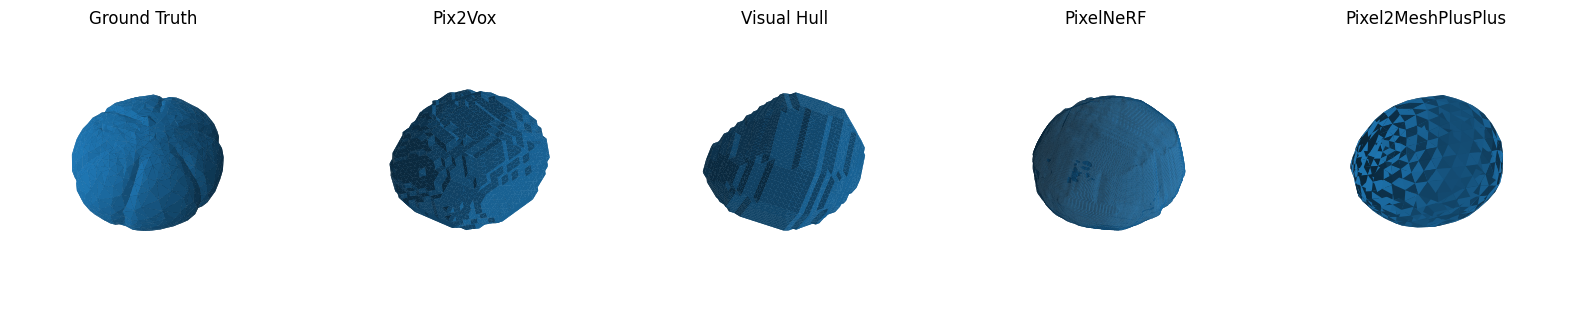

In [6]:
gt = trimesh.load(
    "../data/processed/meshes/17781_Common_thyme_Thymus_vulgaris_pollen_grain.stl"
)
pred = trimesh.load(
    "../TestEvaluationPipeline/data/pix2vox_aug/17781_Common_thyme_Thymus_vulgaris_pollen_grain.stl"
)
pred2 = trimesh.load(
    "../TestEvaluationPipeline/data/vh_6img/17781_Common_thyme_Thymus_vulgaris_pollen_grain.stl"
)

# Load PixelNeRF model
pred3 = trimesh.load(
    "C:/Users/super/Documents/Github/sequoia/TestEvaluationPipeline/data/pollen_augmentation2/17781_Common_thyme_Thymus_vulgaris_pollen_grain.obj"
)

# Load Pixel2MeshPlusPlus model using Open3D to avoid holes
pred4_o3d = o3d.io.read_triangle_mesh(
    "C:/Users/super/Documents/Github/sequoia/TestEvaluationPipeline/data/refine_p2mpp_augmentation_2_inputs/pollen_17781_Common_thyme_Thymus_vulgaris_pollen_grain_00_predict.obj"
)
# Convert to trimesh for consistency with other processing
pred4 = trimesh.Trimesh(
    vertices=np.asarray(pred4_o3d.vertices), faces=np.asarray(pred4_o3d.triangles)
)

mesh_aligned, _ = MeshUtils.align_icp(pred, gt)
mesh_aligned2, _ = MeshUtils.align_icp(pred2, gt)
mesh_aligned3, _ = MeshUtils.align_icp(pred3, gt)
mesh_aligned4, _ = MeshUtils.align_icp(pred4, gt)

rebuilt = trimesh.Trimesh(vertices=mesh_aligned.vertices, faces=pred.faces)
rebuilt2 = trimesh.Trimesh(vertices=mesh_aligned2.vertices, faces=pred2.faces)
rebuilt3 = trimesh.Trimesh(vertices=mesh_aligned3.vertices, faces=pred3.faces)
rebuilt4 = trimesh.Trimesh(vertices=mesh_aligned4.vertices, faces=pred4.faces)

fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(151, projection="3d")
ax2 = fig.add_subplot(152, projection="3d")
ax3 = fig.add_subplot(153, projection="3d")
ax4 = fig.add_subplot(154, projection="3d")
ax5 = fig.add_subplot(155, projection="3d")

for ax in (ax1, ax2, ax3, ax4, ax5):
    ax.grid(False)
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.xaxis.pane.set_edgecolor("none")
    ax.yaxis.pane.set_edgecolor("none")
    ax.zaxis.pane.set_edgecolor("none")
    ax.set_axis_off()

ax1.set_title("Ground Truth")
ax2.set_title("Pix2Vox")
ax3.set_title("Visual Hull")
ax4.set_title("PixelNeRF")
ax5.set_title("Pixel2MeshPlusPlus")

ax1.plot_trisurf(
    gt.vertices[:, 0], gt.vertices[:, 1], gt.vertices[:, 2], triangles=gt.faces
)
ax2.plot_trisurf(
    rebuilt.vertices[:, 0],
    rebuilt.vertices[:, 1],
    rebuilt.vertices[:, 2],
    triangles=rebuilt.faces,
)
ax3.plot_trisurf(
    rebuilt2.vertices[:, 0],
    rebuilt2.vertices[:, 1],
    rebuilt2.vertices[:, 2],
    triangles=rebuilt2.faces,
)
ax4.plot_trisurf(
    rebuilt3.vertices[:, 0],
    rebuilt3.vertices[:, 1],
    rebuilt3.vertices[:, 2],
    triangles=rebuilt3.faces,
)
ax5.plot_trisurf(
    rebuilt4.vertices[:, 0],
    rebuilt4.vertices[:, 1],
    rebuilt4.vertices[:, 2],
    triangles=rebuilt4.faces,
)

plt.show()